# Sharan S
## Assignment 14
## Decision Tree

## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv("C:\\Users\\SHARAN\\Desktop\\ExcelR\\Assignment\\Assignment_14_Decision tree\\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data=pd.get_dummies(data,columns=['ShelveLoc','US','Urban'], drop_first=True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1


In [4]:
#Creating new cols sales and dividing 'Sales' cols on the basis of [0,5.39,9.32,17] for low, moderate and high
data["sales"] = pd.cut(data["Sales"], bins = [0,5.39,9.32,17], labels = ['low','moderate','high'])
data=pd.get_dummies(data,columns=['sales'],drop_first=True)

In [5]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,sales_moderate,sales_high
0,9.50,138,73,11,276,120,42,17,0,0,1,1,0,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1,0,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1,0,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1,1,0
4,4.15,141,64,3,340,128,38,13,0,0,0,1,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Good    400 non-null    uint8  
 9   ShelveLoc_Medium  400 non-null    uint8  
 10  US_Yes            400 non-null    uint8  
 11  Urban_Yes         400 non-null    uint8  
 12  sales_moderate    400 non-null    uint8  
 13  sales_high        400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(6)
memory usage: 27.5 KB


In [7]:
# Normalization
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [8]:
data_norm=norm_func(data.iloc[:,1:])
data_norm.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,sales_moderate,sales_high
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0.0,0.0,1.0,1.0,0.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,0.0,1.0,1.0,0.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,1.0,1.0,1.0,0.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,1.0,1.0,1.0,1.0,0.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
x=data_norm.iloc[:,0:11]
y=data_norm.iloc[:,11:]

In [13]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0.0,0.0,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,0.0,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,1.0,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,1.0,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,0.0,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0,1.0,0.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,0.0,1.0,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0.0,0.0,1.0,1.0


In [14]:
y

,sales_moderate,sales_high
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,0.0
...,...,...
395,0.0,1.0
396,1.0,0.0
397,1.0,0.0
398,1.0,0.0


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [17]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(465.0, 792.75, 'ShelveLoc_Good <= 0.5\nentropy = 0.895\nsamples = 320\nvalue = [[157, 163]\n[244, 76]]'),
 Text(232.5, 566.25, 'ShelveLoc_Medium <= 0.5\nentropy = 0.8\nsamples = 256\nvalue = [[117, 139]\n[218, 38]]'),
 Text(116.25, 339.75, 'Price <= 0.5\nentropy = 0.594\nsamples = 78\nvalue = [[49, 29]\n[75, 3]]'),
 Text(58.125, 113.25, 'entropy = 0.573\nsamples = 29\nvalue = [[10, 19]\n[28, 1]]'),
 Text(174.375, 113.25, 'entropy = 0.488\nsamples = 49\nvalue = [[39, 10]\n[47, 2]]'),
 Text(348.75, 339.75, 'Price <= 0.434\nentropy = 0.837\nsamples = 178\nvalue = [[68, 110]\n[143, 35]]'),
 Text(290.625, 113.25, 'entropy = 0.975\nsamples = 33\nvalue = [[20, 13]\n[14, 19]]'),
 Text(406.875, 113.25, 'entropy = 0.708\nsamples = 145\nvalue = [[48, 97]\n[129, 16]]'),
 Text(697.5, 566.25, 'Price <= 0.512\nentropy = 0.964\nsamples = 64\nvalue = [[40, 24]\n[26, 38]]'),
 Text(581.25, 339.75, 'Education <= 0.938\nentropy = 0.276\nsamples = 21\nvalue = [[20, 1]\n[1, 20]]'),
 Text(523.125, 113.2

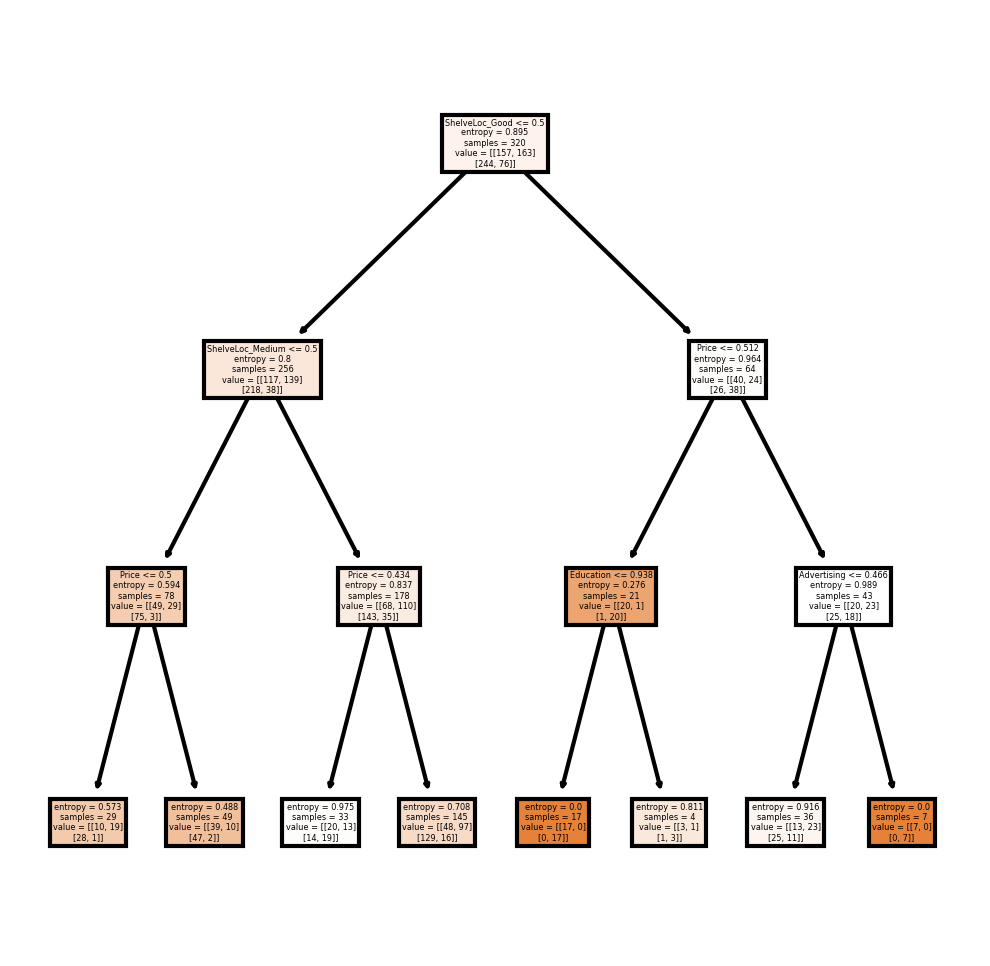

In [18]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Good','ShelveLoc_Medium','US_Yes','Urban_Yes']
cn=['low','moderate','head']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [21]:
# Accuracy
np.mean(preds==y_test)

sales_moderate    0.6125
sales_high        0.8375
dtype: float64